In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drivers_df = pd.read_pickle('../drivers.pkl')
riders_df = pd.read_pickle('../riders.pkl')

# drivers_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/drivers.pkl')
# riders_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/riders.pkl')

In [3]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data_dict = pickle.load(f)
    return data_dict

In [4]:
sim_stats_10k = load_pickle('../simulation_stats_10k.pkl')
sim_stats_5k = load_pickle('../simulation_stats_5k.pkl')
sim_stats_2_5k = load_pickle('../simulation_stats_2_5k.pkl')

In [5]:
riders_df.head()

,id,current_location,origin,destination,become_available,patience_time,status,driver,destination_time
r_0,r_0,"[11.973169683940732, 3.1203728088487304]","[11.973169683940732, 3.1203728088487304]","[3.119890406724053, 1.1616722433639892]",[1.5050607154587605],[24.134770373855815],reached_destination,d_1,[59.03025724589983]
r_1,r_1,"[14.161451555920909, 0.41168988591604894]","[14.161451555920909, 0.41168988591604894]","[19.398197043239886, 16.648852816008436]",[2.1634335622314853],[2.864251502998821],reached_destination,d_67,[1475.382391620139]
r_2,r_2,"[3.6680901970686763, 6.0848448591907545]","[3.6680901970686763, 6.0848448591907545]","[10.495128632644757, 8.638900372842315]",[2.6229746390451174],[4.130675910663821],reached_destination,d_181,[3432.163492424766]
r_3,r_3,"[2.7898772130408367, 5.842892970704363]","[2.7898772130408367, 5.842892970704363]","[7.327236865873834, 9.12139968434072]",[2.723314133419949],[18.455232132444767],reached_destination,d_5,[53.971473423241434]
r_4,r_4,"[10.284688768272233, 11.84829137724085]","[10.284688768272233, 11.84829137724085]","[0.9290082543999545, 12.150897038028766]",[3.1964995703698484],[2.243535023737971],reached_destination,d_9,[244.25359272316072]


In [6]:
drivers_df.columns

Index(['id', 'current_location', 'origin', 'become_available', 'offline_time',
       'status', 'matched_rider', 'earnings', 'current_trip', 'going_offline',
       'number_of_trips', 'fuel_cost', 'total_distance', 'past_pickup',
       'past_trip', 'past_fares', 'past_riders', 'past_locations'],
      dtype='object')

In [7]:
riders_df.columns

Index(['id', 'current_location', 'origin', 'destination', 'become_available',
       'patience_time', 'status', 'driver', 'destination_time'],
      dtype='object')

In [8]:
print('Total drivers who were generated by the simulation were:', drivers_df['id'].count())
print('Total riders who were generated by the simulation were:', riders_df['id'].count())

print('\nRiders to Driver ratio:', (riders_df['id'].count()/drivers_df['id'].count()))

print('\nThis implies that our exponential generation of Riders-Drivers is indeed working\n Now a driver has to fulfill atleast', round((riders_df['id'].count()/drivers_df['id'].count())), 'For complete satisfaction of customers and profit generation')

Total drivers who were generated by the simulation were: 544
Total riders who were generated by the simulation were: 19983

Riders to Driver ratio: 36.73345588235294

This implies that our exponential generation of Riders-Drivers is indeed working
 Now a driver has to fulfill atleast 37 For complete satisfaction of customers and profit generation


In [9]:
print(riders_df['status'].unique())


Rides_Fulfilled = (riders_df['status'] == 'reached_destination').sum()
Rides_Abandoned = (riders_df['status'] == 'abandoned').sum()
Rider_in_transit = (riders_df['status'] == 'transit').sum()
Rider_waiting = (riders_df['status'] == 'waiting').sum()

print('Total rides fulfilled:', Rides_Fulfilled )
print('Total rides Abandoned:', Rides_Abandoned)
print('Total rider which were in transit while the simulation was terminated:', Rider_in_transit)
print('Total rider which were waiting for a driver while the simulation was terminated:', Rider_waiting)

print('\nBefore classifying transit and waiting into abandoned and fulfilled \n Ride Fulfillment Percentage: ',(Rides_Fulfilled/Rides_Abandoned)*100)

print('\n We are missing some riders bruh')
print('not anymore')

['reached_destination' 'abandoned' 'transit' 'waiting']
Total rides fulfilled: 7006
Total rides Abandoned: 12939
Total rider which were in transit while the simulation was terminated: 19
Total rider which were waiting for a driver while the simulation was terminated: 19

Before classifying transit and waiting into abandoned and fulfilled 
 Ride Fulfillment Percentage:  54.14637916376846

 We are missing some riders bruh
not anymore


### Simulations

Meta analysis of simulations

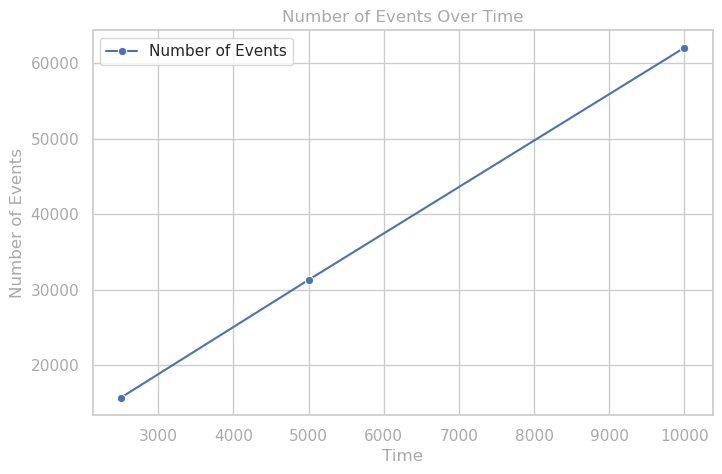

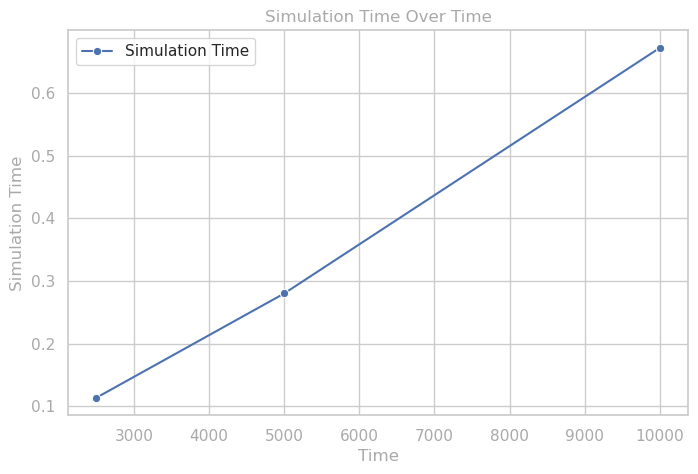

In [10]:
data_list = [
    {'simulation_time': 0.11374855041503906, 'total_time': 18.82762908935547, 'termination': 1739711571.3624566, 'n_events': 15673, 'time': 2500},
    {'simulation_time': 0.2800478935241699, 'total_time': 43.393065214157104, 'termination': 1739711496.6766849, 'n_events': 31292, 'time': 5000},
    {'simulation_time': 0.6719632148742676, 'total_time': 109.55330610275269, 'termination': 1739711353.935902, 'n_events': 62054, 'time': 10000}
]

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data_list)

# Apply log scale to time axis for proportional scaling
df['log_time'] = np.log10(df['time'])

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot 1: Time vs Number of Events
plt.figure(figsize=(8, 5))
sns.lineplot(x='time', y='n_events', data=df, marker='o', label='Number of Events')
plt.xlabel("Time", color='darkgray')
plt.ylabel("Number of Events", color='darkgray')
plt.title("Number of Events Over Time", color='darkgray')
plt.xticks(color='darkgray')
plt.yticks(color='darkgray')
plt.legend()
plt.show()

# Plot 2: Time vs Simulation Time
plt.figure(figsize=(8, 5))
sns.lineplot(x='time', y='simulation_time', data=df, marker='o', label='Simulation Time')
plt.xlabel("Time", color='darkgray')
plt.ylabel("Simulation Time", color='darkgray')
plt.title("Simulation Time Over Time", color='darkgray')
plt.xticks(color='darkgray')
plt.yticks(color='darkgray')
plt.legend()
plt.show()

In [11]:
sim_stats_2_5k

{'simulation_time': 0.11374855041503906,
 'total_time': 18.82762908935547,
 'termination': 1739711571.3624566,
 'n_events': 15673}

In [12]:
sim_stats_5k

{'simulation_time': 0.2800478935241699,
 'total_time': 43.393065214157104,
 'termination': 1739711496.6766849,
 'n_events': 31292}

In [13]:
sim_stats_10k

{'simulation_time': 0.6719632148742676,
 'total_time': 109.55330610275269,
 'termination': 1739711353.935902,
 'n_events': 62054}

### Riders

In [14]:
riders_df['status'].unique()

array(['reached_destination', 'abandoned', 'transit', 'waiting'],
      dtype=object)

/tmp/ipykernel_50039/2009558090.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='status', y='count', data=status_counts, palette=custom_palette)


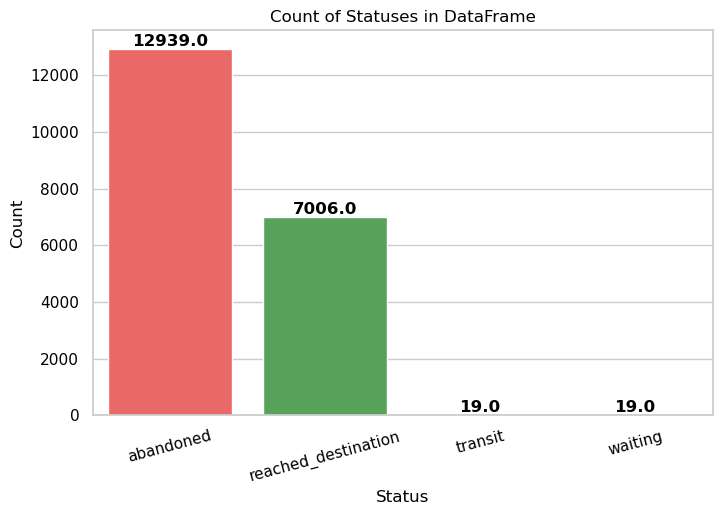

In [15]:
# Count occurrences of each status
status_counts = riders_df['status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']

custom_palette = {
    'reached_destination': '#4CAF50',  # Vibrant Green
    'abandoned': '#FF5252',            # Bright Red
    'transit': '#42A5F5',              # Vivid Blue
    'waiting': '#FFA726'               # Bright Orange
}
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='status', y='count', data=status_counts, palette=custom_palette)

# Labels and title
plt.xlabel("Status", color='black')
plt.ylabel("Count", color='black')
plt.title("Count of Statuses in DataFrame", color='black')
plt.xticks(rotation=15, color='black')  # Slightly tilt labels for readability
plt.yticks(color='black')

# Show values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.show()


Color stil a bit too aggressive for my taste

### rider abandon overtime

In [16]:
riders_df.head()

,id,current_location,origin,destination,become_available,patience_time,status,driver,destination_time
r_0,r_0,"[11.973169683940732, 3.1203728088487304]","[11.973169683940732, 3.1203728088487304]","[3.119890406724053, 1.1616722433639892]",[1.5050607154587605],[24.134770373855815],reached_destination,d_1,[59.03025724589983]
r_1,r_1,"[14.161451555920909, 0.41168988591604894]","[14.161451555920909, 0.41168988591604894]","[19.398197043239886, 16.648852816008436]",[2.1634335622314853],[2.864251502998821],reached_destination,d_67,[1475.382391620139]
r_2,r_2,"[3.6680901970686763, 6.0848448591907545]","[3.6680901970686763, 6.0848448591907545]","[10.495128632644757, 8.638900372842315]",[2.6229746390451174],[4.130675910663821],reached_destination,d_181,[3432.163492424766]
r_3,r_3,"[2.7898772130408367, 5.842892970704363]","[2.7898772130408367, 5.842892970704363]","[7.327236865873834, 9.12139968434072]",[2.723314133419949],[18.455232132444767],reached_destination,d_5,[53.971473423241434]
r_4,r_4,"[10.284688768272233, 11.84829137724085]","[10.284688768272233, 11.84829137724085]","[0.9290082543999545, 12.150897038028766]",[3.1964995703698484],[2.243535023737971],reached_destination,d_9,[244.25359272316072]


/tmp/ipykernel_50039/1250266753.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_counts = temp_df.groupby(['time_interval', 'status']).size().unstack(fill_value=0)


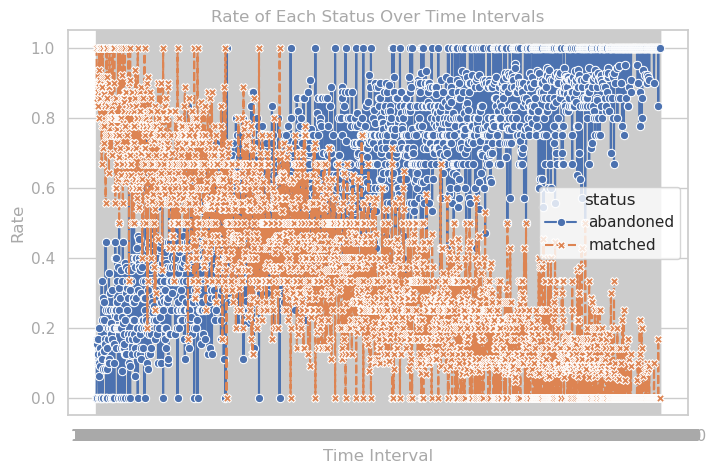

In [17]:
# # Convert time from list to a single value
# riders_df['time'] = riders_df['become_available'].apply(lambda x: x[0])

# temp_df = riders_df.copy()

# # Remove 'waiting' status
# temp_df = temp_df[temp_df['status'] != 'waiting']

# # Define equal-sized time intervals
# time_min, time_max = temp_df['time'].min(), temp_df['time'].max()
# bin_edges = list(range(int(time_min), int(time_max) + 6, 5))  # Creating bins with a max span of 5
# temp_df['time_interval'] = pd.cut(temp_df['time'], bins=bin_edges, labels=[f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)], include_lowest=True)

# # Combine 'reached_destination' and 'transit' into 'matched'
# temp_df['status'] = temp_df['status'].replace({'reached_destination': 'matched', 'transit': 'matched'})

# # Calculate rate of each status over time intervals
# status_counts = temp_df.groupby(['time_interval', 'status']).size().unstack(fill_value=0)
# status_rates = status_counts.div(status_counts.sum(axis=1), axis=0)

# # Set seaborn style
# sns.set_theme(style="whitegrid")

# # Create the line plot for rates
# plt.figure(figsize=(8, 5))
# sns.lineplot(data=status_rates, markers=True)

# # Labels and title
# plt.xlabel("Time Interval", color='darkgray')
# plt.ylabel("Rate", color='darkgray')
# plt.title("Rate of Each Status Over Time Intervals", color='darkgray')
# plt.xticks(color='darkgray')
# plt.yticks(color='darkgray')

# # Show the plot
# plt.show()

/tmp/ipykernel_50039/2568323887.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_counts = temp_df.groupby(['time_interval', 'status']).size().unstack(fill_value=0)


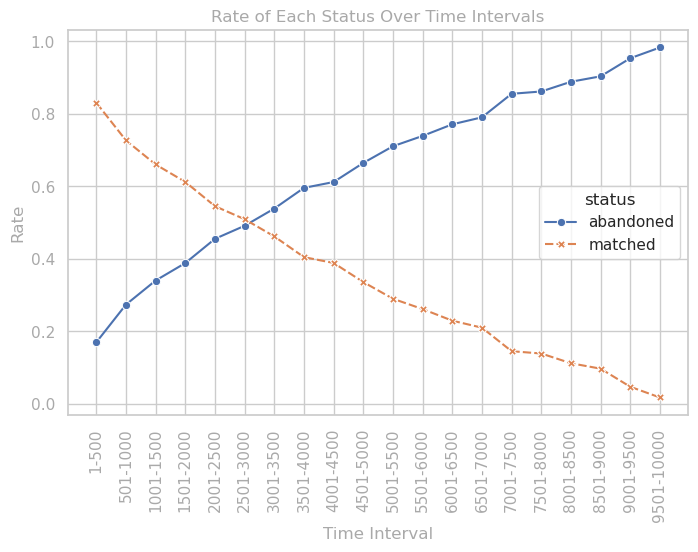

In [18]:
# Convert time from list to a single value
riders_df['time'] = riders_df['become_available'].apply(lambda x: x[0])

temp_df = riders_df.copy()

# Remove 'waiting' status
temp_df = temp_df[temp_df['status'] != 'waiting']

# Define equal-sized time intervals
time_min, time_max = temp_df['time'].min(), temp_df['time'].max()
bin_edges = list(range(int(time_min), int(time_max) + 6, 500))  # Creating bins with a max span of 5
temp_df['time_interval'] = pd.cut(temp_df['time'], bins=bin_edges, labels=[f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)], include_lowest=True)

# Combine 'reached_destination' and 'transit' into 'matched'
temp_df['status'] = temp_df['status'].replace({'reached_destination': 'matched', 'transit': 'matched'})

# Calculate rate of each status over time intervals
status_counts = temp_df.groupby(['time_interval', 'status']).size().unstack(fill_value=0)
status_rates = status_counts.div(status_counts.sum(axis=1), axis=0)

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create the line plot for rates
plt.figure(figsize=(8, 5))
sns.lineplot(data=status_rates, markers=True)

# Labels and title
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Rate", color='darkgray')
plt.title("Rate of Each Status Over Time Intervals", color='darkgray')
plt.xticks(rotation=90, color='darkgray')
plt.yticks(color='darkgray')

# Show the plot
plt.show()

looks like the system will never be stable we might be able to justify this with uniform dist cdf

### Driver in the system overtime

In [19]:
drivers_df['time'] = drivers_df['become_available'].apply(lambda x: x[0])
drivers_df['offline_time'] = drivers_df['offline_time'].apply(lambda x: x[0])
drivers_df['become_available'] = drivers_df['become_available'].apply(lambda x: x[0])

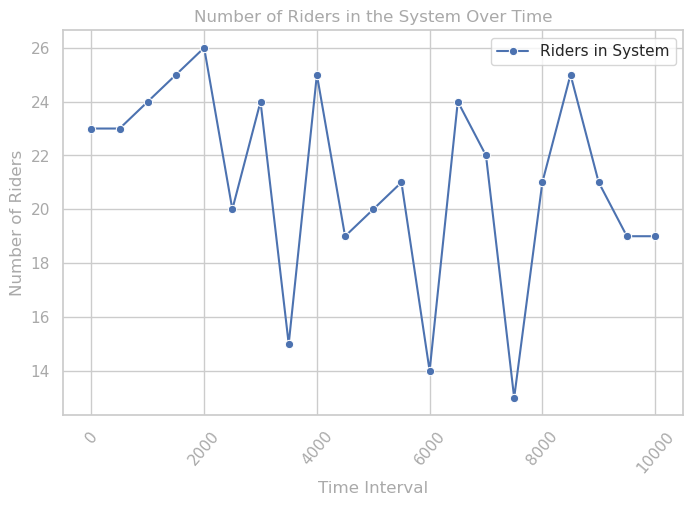

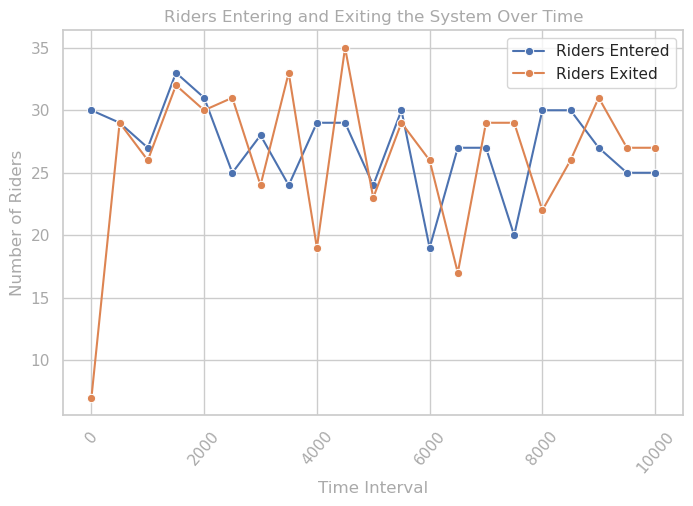

In [21]:
df = drivers_df.copy()
# Define time intervals in 500 increments
time_intervals = np.arange(0, 10001, 500)

# Ensure all lists have the same length
riders_in_system = np.zeros(len(time_intervals))
riders_entered = np.zeros(len(time_intervals))
riders_exited = np.zeros(len(time_intervals))

for i in range(len(time_intervals) - 1):
    t_start, t_end = time_intervals[i], time_intervals[i + 1]
    in_system = ((df['become_available'] <= t_end) & ((df['offline_time'] > t_end) | (df['offline_time'] == np.inf))).sum()
    entered = ((df['become_available'] >= t_start) & (df['become_available'] < t_end)).sum()
    exited = ((df['offline_time'] >= t_start) & (df['offline_time'] < t_end)).sum()
    
    riders_in_system[i] = in_system
    riders_entered[i] = entered
    riders_exited[i] = exited

# Adjust last element for plotting consistency
riders_in_system[-1] = riders_in_system[-2]
riders_entered[-1] = riders_entered[-2]
riders_exited[-1] = riders_exited[-2]

# Create DataFrame for plotting
interval_df = pd.DataFrame({
    'Time': time_intervals,
    'Riders in System': riders_in_system,
    'Riders Entered': riders_entered,
    'Riders Exited': riders_exited
})

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot: Number of riders in the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Riders in System', data=interval_df, marker='o', label='Riders in System')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of Riders", color='darkgray')
plt.title("Number of Riders in the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()

# Plot: Riders entered and exited the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Riders Entered', data=interval_df, marker='o', label='Riders Entered')
sns.lineplot(x='Time', y='Riders Exited', data=interval_df, marker='o', label='Riders Exited')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of Riders", color='darkgray')
plt.title("Riders Entering and Exiting the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()



You can see that numbers of driver become stable overtime.

### Rider in the system overtime

In [22]:
riders_df['time'] = riders_df['become_available'].apply(lambda x: x[0])
riders_df['destination_time'] = riders_df['destination_time'].apply(lambda x: x[0] if isinstance(x, (list, tuple)) and x[0] != np.inf else x)
riders_df['become_available'] = riders_df['become_available'].apply(lambda x: x[0])

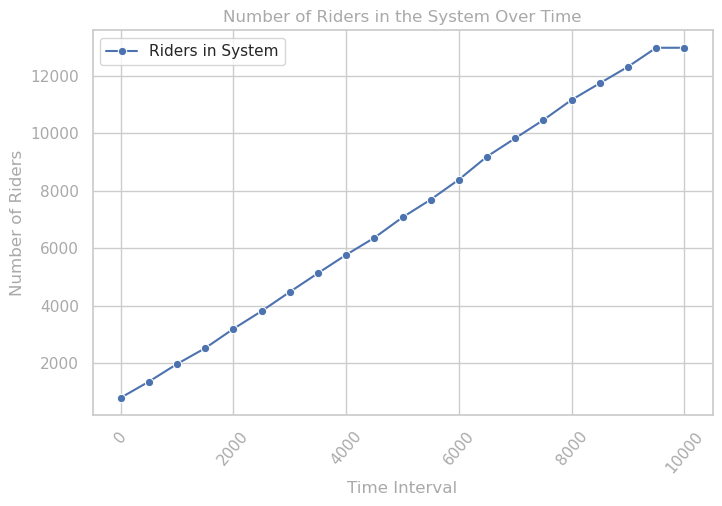

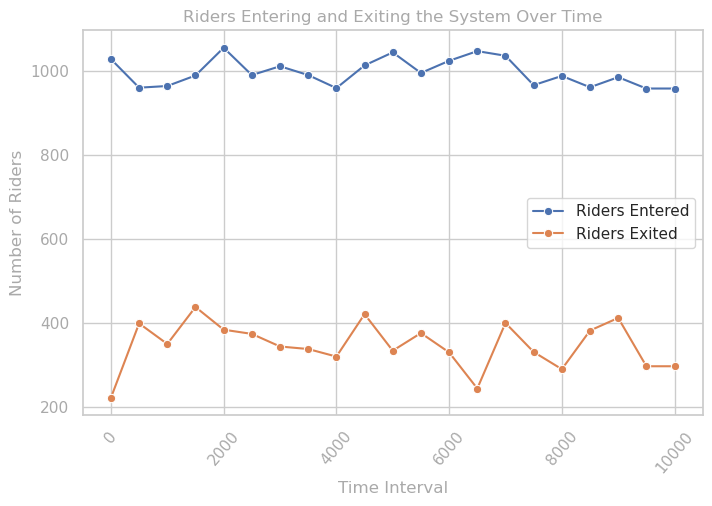

In [23]:
df = riders_df.copy()
# Define time intervals in 500 increments
time_intervals = np.arange(0, 10001, 500)

# Ensure all lists have the same length
riders_in_system = np.zeros(len(time_intervals))
riders_entered = np.zeros(len(time_intervals))
riders_exited = np.zeros(len(time_intervals))

for i in range(len(time_intervals) - 1):
    t_start, t_end = time_intervals[i], time_intervals[i + 1]
    in_system = ((df['become_available'] <= t_end) & ((df['destination_time'] > t_end) | (df['destination_time'] == np.inf))).sum()
    entered = ((df['become_available'] >= t_start) & (df['become_available'] < t_end)).sum()
    exited = ((df['destination_time'] >= t_start) & (df['destination_time'] < t_end)).sum()
    
    riders_in_system[i] = in_system
    riders_entered[i] = entered
    riders_exited[i] = exited

# Adjust last element for plotting consistency
riders_in_system[-1] = riders_in_system[-2]
riders_entered[-1] = riders_entered[-2]
riders_exited[-1] = riders_exited[-2]

# Create DataFrame for plotting
interval_df = pd.DataFrame({
    'Time': time_intervals,
    'Riders in System': riders_in_system,
    'Riders Entered': riders_entered,
    'Riders Exited': riders_exited
})

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot: Number of riders in the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Riders in System', data=interval_df, marker='o', label='Riders in System')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of Riders", color='darkgray')
plt.title("Number of Riders in the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()

# Plot: Riders entered and exited the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Riders Entered', data=interval_df, marker='o', label='Riders Entered')
sns.lineplot(x='Time', y='Riders Exited', data=interval_df, marker='o', label='Riders Exited')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of Riders", color='darkgray')
plt.title("Riders Entering and Exiting the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()



Easily be seen that the riders will linearly increase if riders entered in a faster rate than exited. Resulting in ever increasing riders

In [ ]:
status_rates

In [ ]:
riders_df.loc[riders_df['status'] == 'transit']

Dumping ideas for now, will need to look up on how to code it and what commands I need to use, If its taking too long I will do it later.

1) Drivers satisfaction analysis : We use the amount of time he had to travel to pick people up vs time he was working/transporting, this is useful since we will obtain a clue about the amount of "money spent/wasted" for traveling to a rider vs the amount they were able to obtain, If we consider for all the drivers in an "hour" instead of "minute" or plot for individual drivers we would gain more insights, Recommendation use box plot if we are plotting for hours (12-24 boxes) gives us average driver satisfaction for that hour. 
This is more like a "fuel cost analysis" 

2) Rider satisfaction analysis: Riders waiting, riders abandoned and trips fulfilled, and the total amount of time spent for all those activities, if ride abandoned what was the potential money which was lost. So we can get an idea about the total possible earning from all riders and we split it equally amongst the driver to get an idea about "possible earnings" - here we dont consider fuel usage for now. Later we integrate the actual money earned (Without fuel). Once this is done we include fuel for both the cases, We can plot a bar graph or a line graph to show the changes in each cases. We can also include number of riders and drivers i.e how long it took to match.

3) We can talk about time where the amount of active riders > amount of active drivers 
now there could be multiple cases of this happening so we ensure that we plot it, We have a line graph
plotting at 1 i.e 1:1 ratio for driver and rider, and now every hour this fluctuates showcasing the shift of riders and driver ratio.

4) [IDEA] Driver shift analysis 5 to 8 hour shift split, we reduce/increase the amount of actual time for trip depending on how much drivers are working, this will help us know the earnings per "shifts". Logically as driver is fatigued his attention span and motor skills should reduce so the earnings would be low/less.
can plot revenue vs shift scatterplot with a line (regression line?), the colour would be associated to trips fulfilled by driver

5) Think of a graph so that we can correlate that 34rider per driver ratio and see if the earning was fairly divided amongst the driver, if not fairly what location or time saw this huge bias of earning (eg: driver during the start didnt earn much because lack of riders, while driver in mid simulation earnt more or had the luxury to get more riders because of the fact that there were now way to many riders in the map.)

6) Rider abandoment statistic, We have rider patience time, we need to see if there is a specific limit after which there is a higher chance of riders abandoning, so this will give us an idea of the "ideal" matching time for our drivers. If we get this time we can use it to our leverage. There was a specific filter used for this in statistics, it deals with probability and abandoment of a particular variable.

7) distance to waiting time: Is it possible that riders who want to travel longer have to wait longer? Since its randomly generated data this would be unlikely, but its still a good EDA or a find to have, since in real life this might not be the case, i.e drivers would not take a trip which exceeds a certain distance (so we can potentially account for this in our code.)

8) Driver dropoff analysis: How far a driver moves from their first rider drop off location, are they getting trapped in a certain boundary region like ants (think of it as an invisible wall which they can pass). Mainly this would make it look like that each driver will now have his own terriority, it would be interesting to animate this and see it, but mainly we can use a tree diagram or sankey diagram for drivers to see the distance split. 

9) Utilization : Time during trips/ shift duration , make histogram

10) Try for implementing a different map/grid/ change hotspots etc.